In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 152)
pd.set_option('display.max_rows', 152)

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',)
df.drop('member_id',axis=1,inplace=True)
df = df[df['issue_d'].notna()]
df = df.sample(frac=0.8)
df.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
223398,54818802,12000.0,12000.0,12000.0,36 months,15.61,419.58,D,D1,member service rep,8 years,MORTGAGE,56000.0,Source Verified,Jul-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,057xx,VT,28.10,0.0,May-1999,665.0,669.0,1.0,NaN,82.0,11.0,1.0,8781.0,57.8,48.0,w,0.00,0.00,13512.280000,13512.28,12000.00,1512.28,0.0,0.00,0.000,Jun-2016,9026.50,NaN,Mar-2019,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,40399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15200.0,NaN,NaN,NaN,10.0,3673.0,2124.0,7.7,0.0,0.0,142.0,193.0,8.0,4.0,3.0,19.0,NaN,3.0,NaN,0.0,1.0,4.0,2.0,10.0,24.0,7.0,20.0,4.0,11.0,0.0,0.0,0.0,6.0,100.0,0.0,1.0,0.0,58342.0,40399.0,2300.0,43142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1072547,71033356,35000.0,35000.0,35000.0,36 months,7.39,1086.96,A,A4,CEO,9 years,MORTGAGE,600000.0,Source Verified,Feb-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,850xx,AZ,3.16,0.0,Sep-1995,750.0,754.0,0.0,NaN,54.0,12.0,2.0,6846.0,17.2,17.0,w,0.00,0.00,14484.440000,14484.44,9886.28,2055.91,0.0,2542.25,457.605,Jan-2017,1086.96,NaN,May-2016,734.0,730.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,1317777.0,1.0,2.0,0.0,2.0,14.0,74515.0,25.0,1.0,2.0,4446.0,19.0,39800.0,2.0,1.0,0.0,5.0,109815.0,25937.0,19.9,0.0,0.0,245.0,139.0,4.0,4.0,1.0,14.0,NaN,15.0,NaN,0.0,3.0,4.0,5.0,5.0,7.0,9.0,9.0,4.0,12.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,2.0,1411137.0,81361.0,32400.0,9

In [3]:
df.isnull().sum()

id                                                  0
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      133928
emp_length                                     117808
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                                                 0
desc                        

In [4]:
df['year']=df.issue_d.map(lambda x:int(x.split('-')[-1]))
df.sample(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
513602,126956811,15000.0,15000.0,15000.0,60 months,9.93,318.19,B,B2,Teacher,< 1 year,RENT,46000.0,Not Verified,Jan-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,018xx,MA,7.91,0.0,Aug-2007,780.0,784.0,0.0,NaN,NaN,10.0,0.0,815.0,6.1,14.0,w,12132.01,12132.01,4450.52,4450.52,2867.99,1582.53,0.0,0.0,0.0,Mar-2019,318.19,Apr-2019,Mar-2019,789.0,785.0,0.0,NaN,1.0,Joint App,79000.0,8.02,Not Verified,0.0,0.0,40730.0,0.0,8.0,0.0,0.0,64.0,39915.0,94.0,0.0,2.0,815.0,73.0,13400.0,0.0,0.0,0.0,2.0,4073.0,9185.0,8.2,0.0,0.0,125.0,25.0,19.0,19.0,0.0,20.0,NaN,19.0,NaN,0.0,1.0,1.0,1.0,1.0,11.0,2.0,3.0,1.0,10.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,56032.0,40730.0,10000.0,42632.0,2753.0,670.0,674.0,Nov-2008,0.0,0.0,7.0,96.9,6.0,2.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018
195250,56071992,20000.0,20000.0,19975.0,60 months,21.99,552.27,F,F1,Sales Mgr,10+ years,RENT,53000.0,Verified,Aug-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,388xx,MS,11.25,0.0,Dec-2009,660.0,664.0,0.0,NaN,NaN,4.0,0.0,8460.0,57.9,6.0,f,8004.17,7994.17,23881.99,23852.14,11995.83,11886.16,0.0,0.0,0.0,Mar-2019,552.27,Apr-2019,Mar-2019,769.0,765.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,18292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14600.0,NaN,NaN,NaN,2.0,4573.0,271.0,96.1,0.0,0.0,67.0,62.0,11.0,4.0,0.0,48.0,NaN,5.0,NaN,0.0,1.0,3.0,1.0,1.0,2.0,3.0,4.0,3.0,4.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,24600.0,18292.0,7000.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
L = ["Charged Off","Fully Paid"]
temp = df[ ( (df.loan_status==L[0] ) | (df.loan_status==L[1]) )  ]

#temp.loan_status = temp.loan_status.map({'Charged Off':0,'Fully Paid':1})
temp.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
1836434,5756157,5000.0,5000.0,5000.0,36 months,12.12,166.36,B,B3,B & G Foods,10+ years,MORTGAGE,50000.0,Not Verified,Jun-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home Improvement,370xx,TN,14.59,0.0,Oct-2005,675.0,679.0,1.0,37.0,NaN,11.0,0.0,7468.0,40.6,24.0,f,0.0,0.0,5988.230000,5988.23,5000.0,988.23,0.0,0.0,0.0,May-2016,331.99,NaN,May-2016,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,65.0,109335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18400.0,NaN,NaN,NaN,5.0,9940.0,5686.0,50.1,0.0,0.0,87.0,93.0,3.0,3.0,1.0,14.0,NaN,5.0,NaN,0.0,4.0,7.0,5.0,7.0,11.0,9.0,12.0,7.0,11.0,0.0,0.0,0.0,2.0,95.0,0.0,0.0,0.0,128202.0,24257.0,11400.0,20998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2013
730323,77516332,9475.0,9475.0,9475.0,36 months,5.32,285.34,A,A1,Vice-President,10+ years,MORTGAGE,60000.0,Not Verified,Apr-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,405xx,KY,24.09,0.0,Aug-2002,755.0,759.0,0.0,34.0,NaN,10.0,0.0,11790.0,32.6,20.0,w,0.0,0.0,10226.632972,10226.63,9475.0,751.63,0.0,0.0,0.0,Aug-2018,2528.05,NaN,Mar-2019,719.0,715.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,195465.0,0.0,2.0,1.0,2.0,9.0,26464.0,80.0,0.0,0.0,5492.0,55.0,36200.0,0.0,0.0,0.0,2.0,19547.0,21210.0,35.7,0.0,0.0,102.0,164.0,36.0,9.0,3.0,36.0,NaN,NaN,34.0,0.0,5.0,5.0,6.0,9.0,6.0,7.0,11.0,5.0,10.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,244401.0,38254.0,33000.0,33201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
temp['work_year'] = temp.emp_length.replace(to_replace ='[^0-9]', value = '', regex = True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
#temp = temp.dropna()
temp.work_year = pd.to_numeric(temp.work_year)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
temp.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,work_year
1836434,5756157,5000.0,5000.0,5000.0,36 months,12.12,166.36,B,B3,B & G Foods,10+ years,MORTGAGE,50000.0,Not Verified,Jun-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home Improvement,370xx,TN,14.59,0.0,Oct-2005,675.0,679.0,1.0,37.0,NaN,11.0,0.0,7468.0,40.6,24.0,f,0.0,0.0,5988.230000,5988.23,5000.0,988.23,0.0,0.0,0.0,May-2016,331.99,NaN,May-2016,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,65.0,109335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18400.0,NaN,NaN,NaN,5.0,9940.0,5686.0,50.1,0.0,0.0,87.0,93.0,3.0,3.0,1.0,14.0,NaN,5.0,NaN,0.0,4.0,7.0,5.0,7.0,11.0,9.0,12.0,7.0,11.0,0.0,0.0,0.0,2.0,95.0,0.0,0.0,0.0,128202.0,24257.0,11400.0,20998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10.0
730323,77516332,9475.0,9475.0,9475.0,36 months,5.32,285.34,A,A1,Vice-President,10+ years,MORTGAGE,60000.0,Not Verified,Apr-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,405xx,KY,24.09,0.0,Aug-2002,755.0,759.0,0.0,34.0,NaN,10.0,0.0,11790.0,32.6,20.0,w,0.0,0.0,10226.632972,10226.63,9475.0,751.63,0.0,0.0,0.0,Aug-2018,2528.05,NaN,Mar-2019,719.0,715.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,195465.0,0.0,2.0,1.0,2.0,9.0,26464.0,80.0,0.0,0.0,5492.0,55.0,36200.0,0.0,0.0,0.0,2.0,19547.0,21210.0,35.7,0.0,0.0,102.0,164.0,36.0,9.0,3.0,36.0,NaN,NaN,34.0,0.0,5.0,5.0,6.0,9.0,6.0,7.0,11.0,5.0,10.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,244401.0,38254.0,33000.0,33201.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

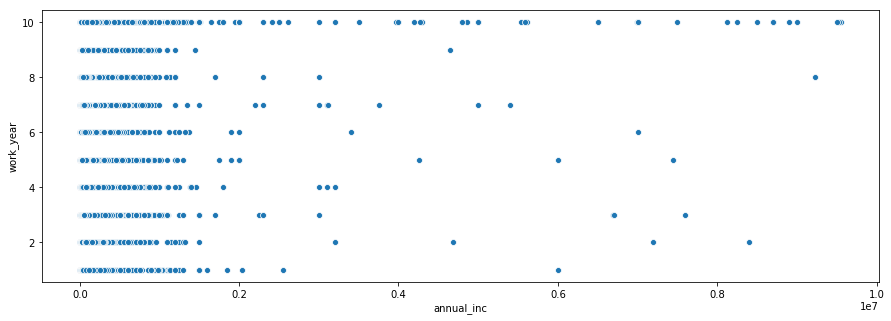

In [9]:
#temp.annual_inc.sort_values()
#temp.emp_length
plt.rcParams["figure.figsize"] = [15, 5]
sns.scatterplot(x='annual_inc',y='work_year',data=temp)
plt.rcParams["figure.figsize"] = [15, 5]

Text(0.5, 1.0, 'Frequency of loan per class')

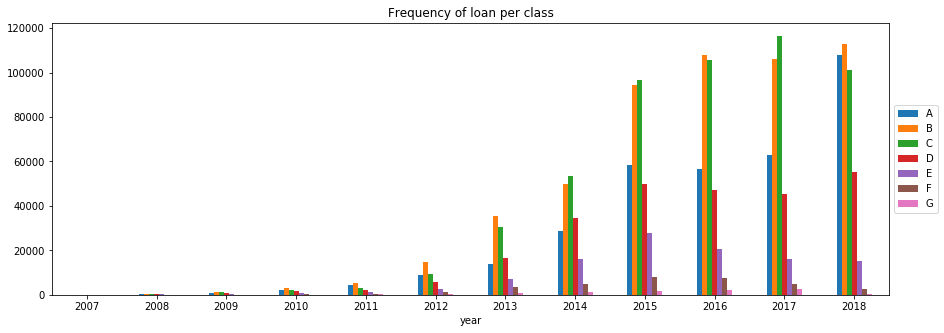

In [10]:
plt.rcParams["figure.figsize"] = [15, 5]
g = df.groupby(['year'])['grade'].value_counts().unstack(1).plot(kind='bar',)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=0)
plt.title('Frequency of loan per class')



In [11]:

df.groupby(['year'])['grade'].value_counts().unstack(1)

grade,A,B,C,D,E,F,G
year,,,,,,,
2007,69,82,113,78,76,39,31
2008,255,462,451,337,228,89,72
2009,955,1173,1104,660,257,85,44
2010,2273,2932,2188,1517,749,252,113
2011,4553,5268,3103,2212,1397,574,168
2012,8694,14812,9468,5844,2552,1076,213
2013,14063,35340,30562,16459,7264,3518,689
2014,28850,49652,53261,34444,16049,5032,1355
2015,58592,94269,96498,50078,27930,7877,1742


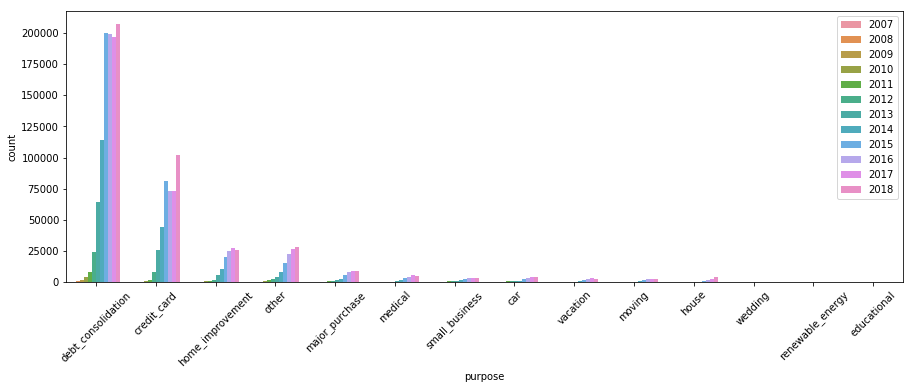

In [12]:
#temp = df[df.purpose=='Charged Off']
#chart = sns.countplot(x='purpose',data=temp,hue='year',order = temp.purpose.value_counts(normalize=True).index)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

chart = sns.countplot(x='purpose',data=df,hue='year',order = df.purpose.value_counts().index,)#,color='loan_status')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

#temp = df[df.purpose=='Charged Off']
#chart = sns.countplot(x='purpose',data=temp,hue='year',order = temp.purpose.value_counts(normalize=True).index)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.legend(loc='upper right')

In [13]:
set(df.loan_status)

{'Charged Off',
 'Current',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Does not meet the credit policy. Status:Fully Paid',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)'}

In [14]:
# try to display the count of charged off in the plot

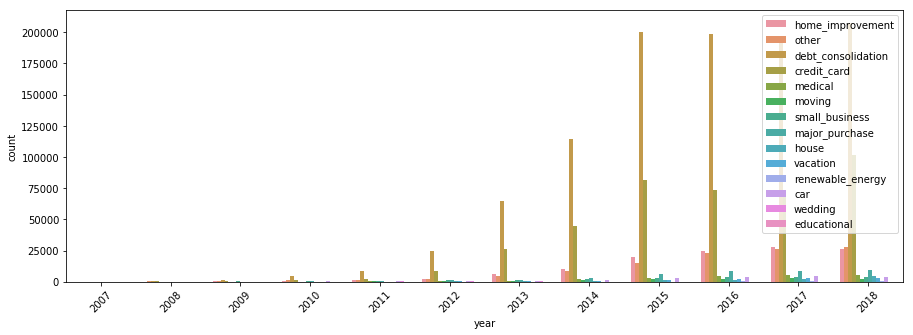

In [15]:
chart = sns.countplot(x='year',data=df,hue='purpose')#,color='loan_status')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.legend(loc='upper right')

In [16]:
# for each year percentage 
# eg 2007 75% of the loan were car loan and 25% credit card

In [17]:
df.year.dtypes

dtype('int64')

In [18]:
#  There are different factors that influence on the level of risk of the loan.
# 

In [19]:
df.loan_status

1836434                                           Fully Paid
730323                                            Fully Paid
815785                                            Fully Paid
1278002                                           Fully Paid
653326                                            Fully Paid
2244200                                           Fully Paid
370739                                           Charged Off
999748                                               Current
2016664                                              Current
2191000                                           Fully Paid
1901665                                           Fully Paid
1428829                                              Current
1333301                                           Fully Paid
19745                                             Fully Paid
2011540                                              Current
1318795                                           Fully Paid
1808893                 

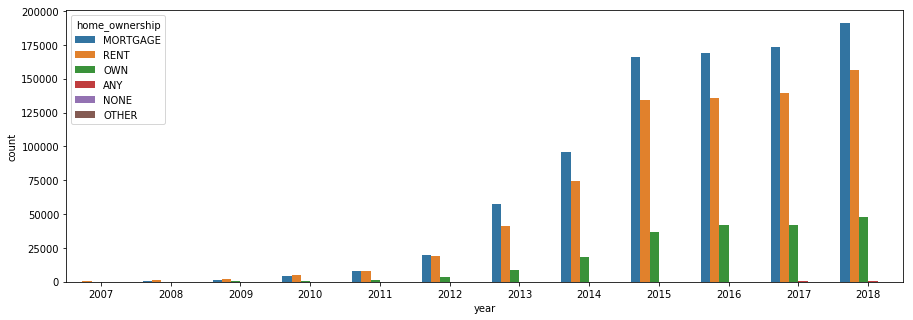

In [20]:
sns.countplot(x='year',hue='home_ownership',data=df)

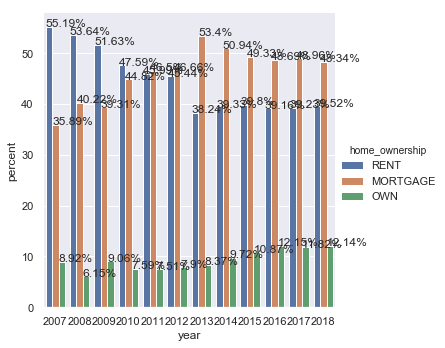

In [21]:
L = ["MORTGAGE","RENT","OWN"]
temp = df[(df.home_ownership==L[0] )| ( df.home_ownership==L[1]) | (df.home_ownership==L[2] ) ]

sns.set(rc={'figure.figsize':(21.7,8.27)})

x,y = 'year', 'home_ownership'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)



In [22]:
df.year

1836434    2013
730323     2016
815785     2018
1278002    2014
653326     2016
2244200    2016
370739     2015
999748     2016
2016664    2016
2191000    2016
1901665    2012
1428829    2018
1333301    2014
19745      2015
2011540    2016
1318795    2014
1808893    2013
1658445    2017
1455987    2018
1069702    2016
1148212    2014
1548591    2018
345207     2015
603881     2017
565241     2017
2198191    2016
2251517    2016
1227301    2014
542157     2017
1400404    2018
717115     2016
307280     2015
1280532    2014
326951     2015
884996     2017
559963     2017
2111773    2017
1428711    2018
152292     2015
1660936    2017
133938     2015
1110671    2016
1638737    2010
1227710    2014
1876930    2013
1401526    2018
2029775    2016
1455827    2018
1782818    2013
1116454    2016
1999881    2016
1804798    2013
2070355    2017
465064     2018
1456076    2018
1955953    2016
1867904    2013
259237     2015
224253     2015
1020947    2016
873438     2018
898270     2017
2162583 

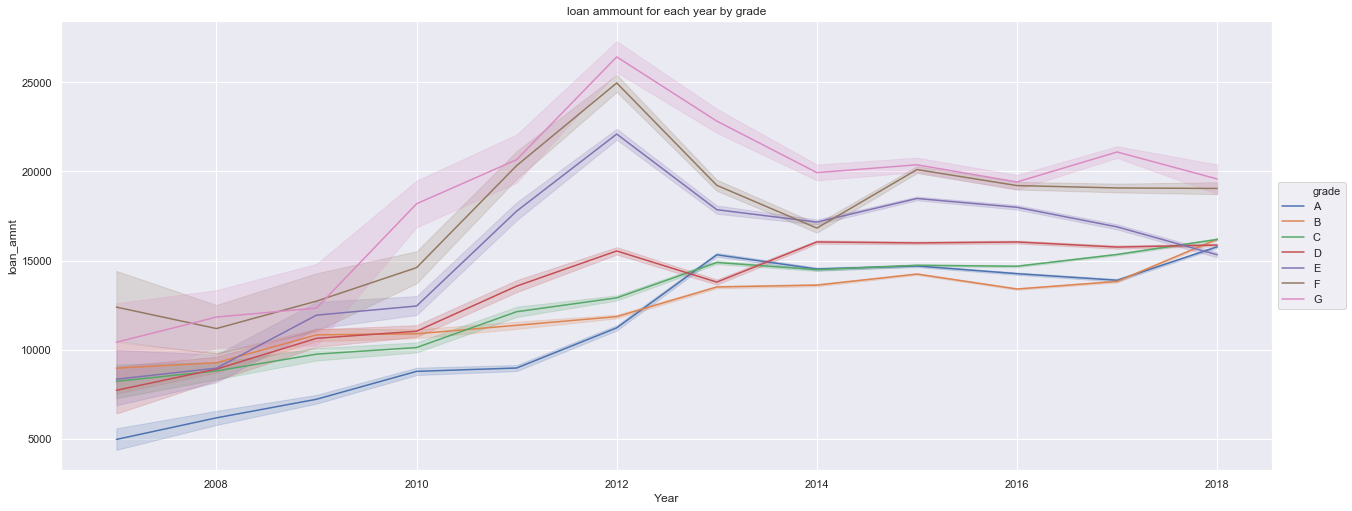

In [23]:
g = sns.lineplot(x='year',y='loan_amnt',hue='grade',data=df,hue_order=['A','B','C','D','E','F','G'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Year')
plt.title('loan ammount for each year by grade')
plt.show()


In [24]:
df.annual_inc.describe()

count    1.808530e+06
mean     7.788991e+04
std      7.481814e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      9.930475e+06
Name: annual_inc, dtype: float64

In [25]:
temp = df.copy()

In [26]:
temp = df.copy()
temp['status'] = df.annual_inc.copy()

temp['status'] = np.where(temp['annual_inc'].between(0,46500), 'first_q',temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(46500,66000), 'second_q', temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(66000,93000), 'third_q', temp['status'])
temp['status'] = np.where(temp['annual_inc'].between(93000,9999999999), 'fourth_q', temp['status'])

temp[['annual_inc','status']]

,annual_inc,status
1836434,50000.0,second_q
730323,60000.0,second_q
815785,71493.0,third_q
1278002,40000.0,first_q
653326,75000.0,third_q
2244200,22500.0,first_q
370739,70000.0,third_q
999748,40000.0,first_q
2016664,29422.0,first_q
2191000,57000.0,second_q


In [27]:
temp.status.value_counts()

second_q    466462
first_q     456756
fourth_q    455064
third_q     430248
nan              4
Name: status, dtype: int64

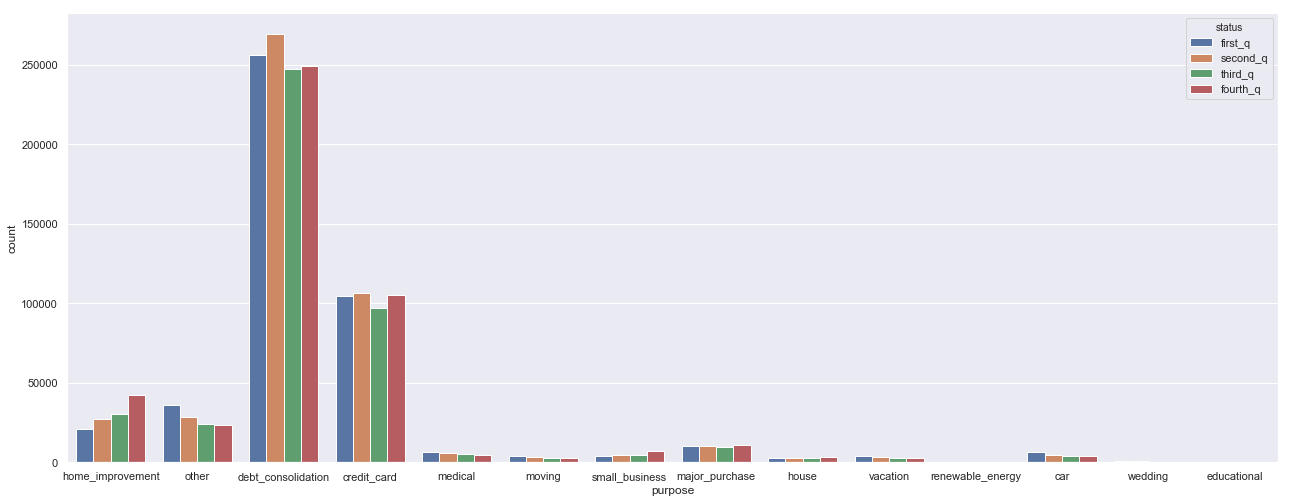

In [28]:
sns.countplot(x='purpose',hue='status',data=temp,hue_order=["first_q","second_q","third_q","fourth_q"])

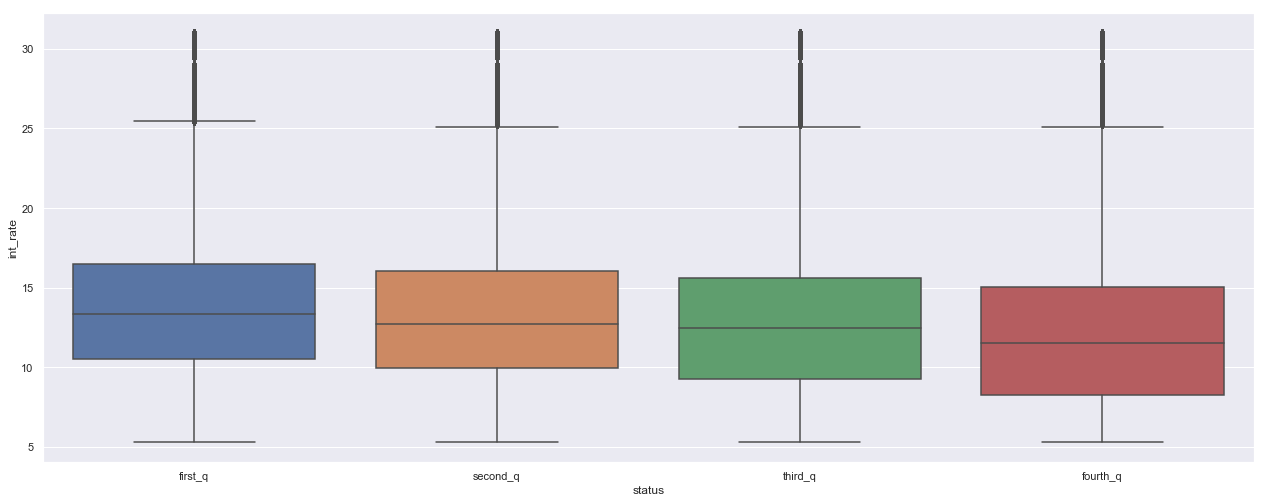

In [29]:
sns.boxplot(x='status',y='int_rate',data=temp,order=["first_q","second_q","third_q","fourth_q"])

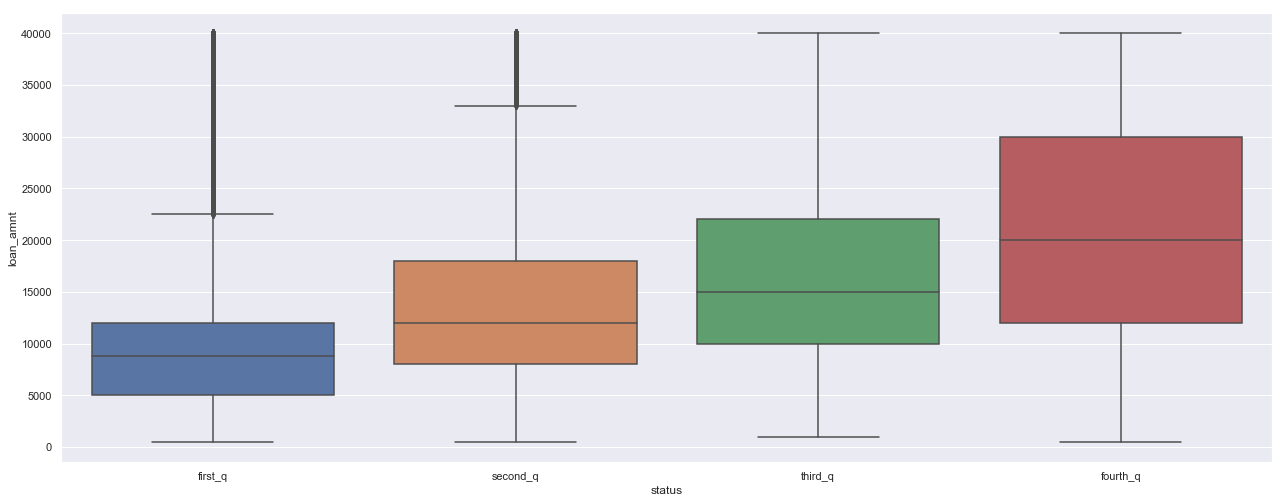

In [30]:
sns.boxplot(x='status',y='loan_amnt',data=temp,order=["first_q","second_q","third_q","fourth_q"])

In [31]:
import re
#re.sub("\D", "", temp.emp_length)
#  re.sub("[^0-9]", "", lambda a:temp.emp_length)
temp.emp_length = temp.emp_length.replace(to_replace ='[^0-9]', value = '', regex = True) 
ddd = temp[["emp_length",'status']].dropna()
ddd.head()

,emp_length,status
1836434,10,second_q
730323,10,second_q
1278002,1,first_q
653326,2,third_q
370739,8,third_q


In [32]:
ddd.shape
ddd.emp_length.value_counts(dropna=False)

10    598674
1     270753
2     162654
3     144787
5     111736
4     109248
6      82043
7      73878
8      73597
9      63356
Name: emp_length, dtype: int64

In [33]:
ddd.emp_length = ddd.emp_length.astype(float)

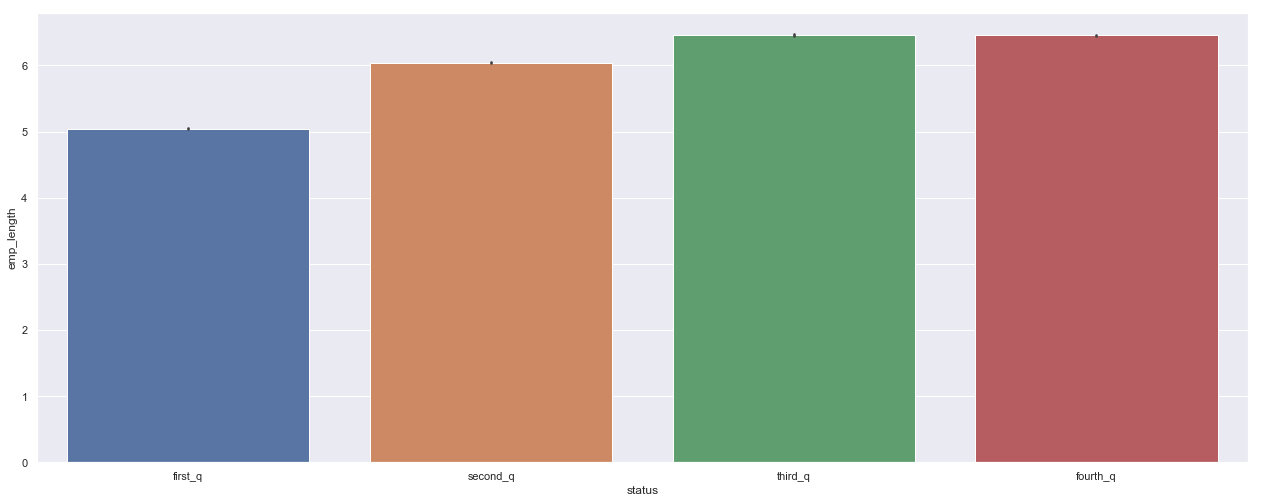

In [34]:
sns.barplot(x='status',y='emp_length',data=ddd,order=["first_q","second_q","third_q","fourth_q"])

In [ ]:
set(df.loan_status)

In [37]:
# begining

temp = df[df.loan_status!='Current']
print(temp.shape)
temp.head()

(1105844, 151)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
1836434,5756157,5000.0,5000.0,5000.0,36 months,12.12,166.36,B,B3,B & G Foods,10+ years,MORTGAGE,50000.0,Not Verified,Jun-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home Improvement,370xx,TN,14.59,0.0,Oct-2005,675.0,679.0,1.0,37.0,NaN,11.0,0.0,7468.0,40.6,24.0,f,0.0,0.0,5988.230000,5988.23,5000.0,988.23,0.0,0.0,0.0,May-2016,331.99,NaN,May-2016,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,65.0,109335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18400.0,NaN,NaN,NaN,5.0,9940.0,5686.0,50.1,0.0,0.0,87.0,93.0,3.0,3.0,1.0,14.0,NaN,5.0,NaN,0.0,4.0,7.0,5.0,7.0,11.0,9.0,12.0,7.0,11.0,0.0,0.0,0.0,2.0,95.0,0.0,0.0,0.0,128202.0,24257.0,11400.0,20998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2013
730323,77516332,9475.0,9475.0,9475.0,36 months,5.32,285.34,A,A1,Vice-President,10+ years,MORTGAGE,60000.0,Not Verified,Apr-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,405xx,KY,24.09,0.0,Aug-2002,755.0,759.0,0.0,34.0,NaN,10.0,0.0,11790.0,32.6,20.0,w,0.0,0.0,10226.632972,10226.63,9475.0,751.63,0.0,0.0,0.0,Aug-2018,2528.05,NaN,Mar-2019,719.0,715.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,195465.0,0.0,2.0,1.0,2.0,9.0,26464.0,80.0,0.0,0.0,5492.0,55.0,36200.0,0.0,0.0,0.0,2.0,19547.0,21210.0,35.7,0.0,0.0,102.0,164.0,36.0,9.0,3.0,36.0,NaN,NaN,34.0,0.0,5.0,5.0,6.0,9.0,6.0,7.0,11.0,5.0,10.0,0.0,0.0,0.0,1.0,95.0,0.0,0.0,0.0,244401.0,38254.0,33000.0,33201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [38]:
temp['status'] = temp.loan_status.apply(lambda x:'Fully Paid' if x =='Fully Paid' else 'Default' )
temp['status']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1836434    Fully Paid
730323     Fully Paid
815785     Fully Paid
1278002    Fully Paid
653326     Fully Paid
2244200    Fully Paid
370739        Default
2191000    Fully Paid
1901665    Fully Paid
1333301    Fully Paid
19745      Fully Paid
1318795    Fully Paid
1808893    Fully Paid
1069702    Fully Paid
1148212       Default
345207     Fully Paid
603881        Default
565241     Fully Paid
2198191       Default
1227301    Fully Paid
717115        Default
307280     Fully Paid
1280532    Fully Paid
326951     Fully Paid
559963     Fully Paid
133938     Fully Paid
1110671    Fully Paid
1638737    Fully Paid
1227710       Default
1876930    Fully Paid
2029775    Fully Paid
1782818    Fully Paid
1116454    Fully Paid
1999881       Default
1804798    Fully Paid
1955953       Default
1867904    Fully Paid
259237     Fully Paid
1020947    Fully Paid
898270        Default
419007     Fully Paid
1211070    Fully Paid
5969       Fully Paid
512461     Fully Paid
419109     Fully Paid
1036275   

In [40]:
#Low-risk loans: Fully Paid
#High-risk Loans: Defaulted, Charged off, Settlement, In Grace Period, and Late Payments. 

Fully Paid    861536
Default       244308
Name: status, dtype: int64

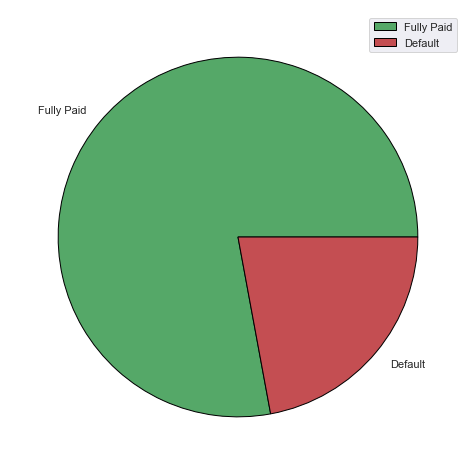

In [47]:

plt.pie(temp['status'].value_counts())
labels = ['Fully Paid','Default']
plt.pie(temp['status'].value_counts(),labels=labels,wedgeprops={'edgecolor':'black'})
plt.legend()

In [48]:
temp.groupby('year')['status'].value_counts(normalize=True).pipe(sns.bar)

year  status    
2007  Default       0.645492
      Fully Paid    0.354508
2008  Fully Paid    0.544351
      Default       0.455649
2009  Fully Paid    0.778869
      Default       0.221131
2010  Fully Paid    0.802374
      Default       0.197626
2011  Fully Paid    0.848857
      Default       0.151143
2012  Fully Paid    0.838041
      Default       0.161959
2013  Fully Paid    0.843954
      Default       0.156046
2014  Fully Paid    0.813586
      Default       0.186414
2015  Fully Paid    0.793849
      Default       0.206151
2016  Fully Paid    0.748304
      Default       0.251696
2017  Fully Paid    0.716538
      Default       0.283462
2018  Fully Paid    0.696858
      Default       0.303142
Name: status, dtype: float64

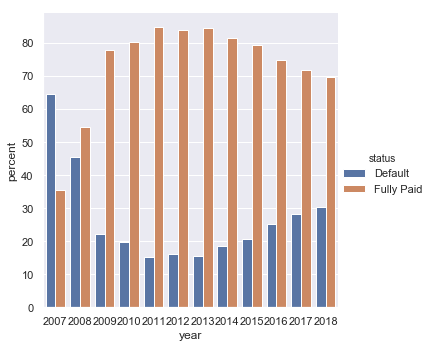

In [54]:
x,y = 'year', 'status'
g = (temp
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index() 
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')  )